In [73]:
import requests

url = "https://realtor16.p.rapidapi.com/forsale"

querystring = {"location":"Tulsa, OK","type":"single_family,condos"}

headers = {
    "X-RapidAPI-Key": "",
    "X-RapidAPI-Host": "realtor16.p.rapidapi.com"
}

results = []
offset = 0
limit = 100

while len(results) < 100:
    querystring["offset"] = offset
    querystring["limit"] = limit

    response = requests.request("GET", url, headers=headers, params=querystring)

    # Print the response to inspect its structure
    print(response.json())
    
    # Parse the JSON response and add the results to the list
    data = response.json()["Listings"]
    results.extend(data)

    # Increment the offset by the limit
    offset += limit

print(len(results))  # Should print 100 to fulfill project requirement

{'home_search': {'count': 50, 'results': [{'branding': [{'name': 'Keller Williams Advantage', 'photo': None, 'type': 'Office'}], 'coming_soon_date': None, 'community': None, 'description': {'baths': 2, 'baths_1qtr': None, 'baths_3qtr': None, 'baths_full': 2, 'baths_half': None, 'beds': 4, 'garage': 2, 'lot_sqft': 7971, 'name': None, 'sold_date': '2017-02-01', 'sold_price': 214000, 'sqft': 1607, 'stories': 1, 'sub_type': None, 'type': 'single_family', 'year_built': 2016}, 'flags': {'is_coming_soon': None, 'is_contingent': None, 'is_foreclosure': None, 'is_new_construction': None, 'is_new_listing': True, 'is_pending': None, 'is_plan': None, 'is_price_reduced': None, 'is_subdivision': None}, 'last_update_date': '2023-04-11T11:10:03Z', 'lead_attributes': {'lead_type': 'co_broke', 'opcity_lead_attributes': {'cashback_enabled': False, 'flip_the_market_enabled': False}, 'ready_connect_mortgage': {'show_contact_a_lender': True, 'show_veterans_united': True}, 'show_contact_an_agent': True}, 'li

KeyError: 'Listings'

In [65]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import json
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [66]:
# Define the API parameters
url = "https://realtor16.p.rapidapi.com/forsale"
querystring = {"location": "Tulsa, OK", "type": "single_family"}

In [67]:
# Define the API headers
headers = {
    "X-RapidAPI-Key": "",
    "X-RapidAPI-Host": "realtor16.p.rapidapi.com",
}

In [68]:
# Send the API request and get the response
response = requests.get(url, headers=headers, params=querystring)
data = response.json()

In [69]:
print(df.head())

     price  beds  baths_full   sqft  year_built
0   179500     3           2   1913        1972
1   206000     3           1   1453        1955
2   315000     3           2   2374        1980
3   230000     3           2   2100        1973
4  8500000     7           7  15900        1928


In [70]:
# Extract the relevant data from the response
response_data = json.loads(response.text)
df = pd.DataFrame(response_data["home_search"]["results"])
df = df[["list_price", "description"]]
df["beds"] = df["description"].apply(lambda x: x["beds"])
df["baths"] = df["description"].apply(lambda x: x["baths_full"])
df["sqft"] = df["description"].apply(lambda x: x["sqft"])
df["year_built"] = df["description"].apply(lambda x: x["year_built"])
df = df[["list_price", "beds", "baths", "sqft", "year_built"]]
df.columns = ["price", "beds", "baths_full", "sqft", "year_built"]

In [76]:
print(df.shape[0])

50


In [25]:
# Preprocess the data
df = df.dropna()
X = df.drop("price", axis=1)
y = df["price"]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [47]:
# Add quadratic features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [49]:
# Train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Evaluate the model on the testing data
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("R^2:", r2)

MAE: 0.08277684853366725
R^2: 0.9814852880289772


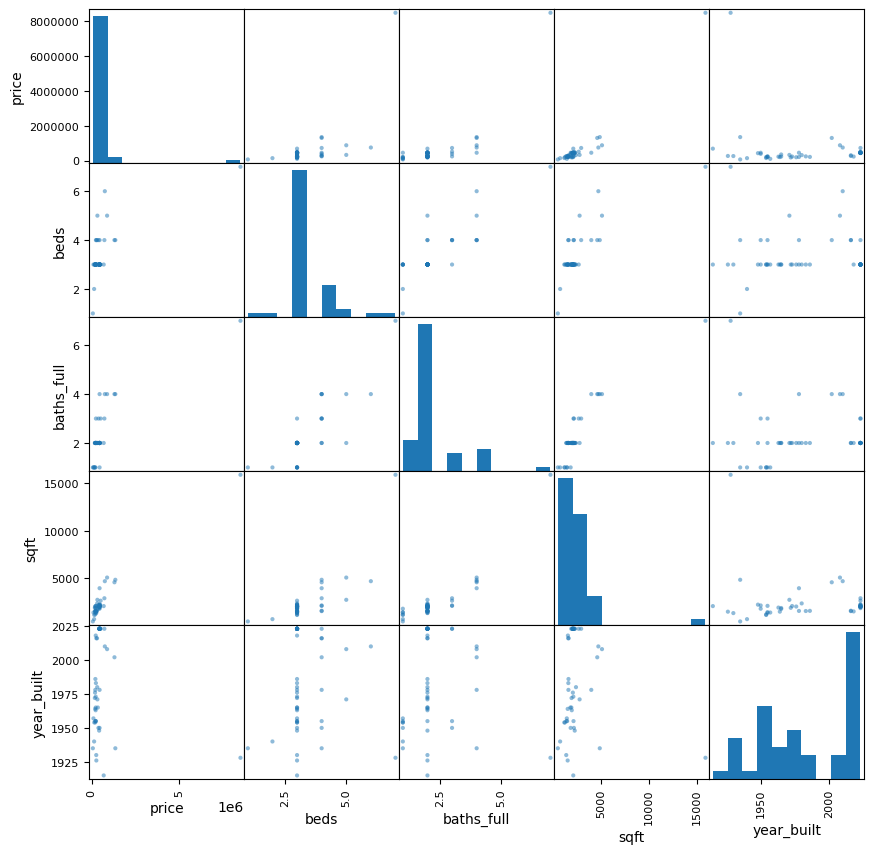

In [77]:
pd.plotting.scatter_matrix(df, figsize=(10, 10))
plt.show()

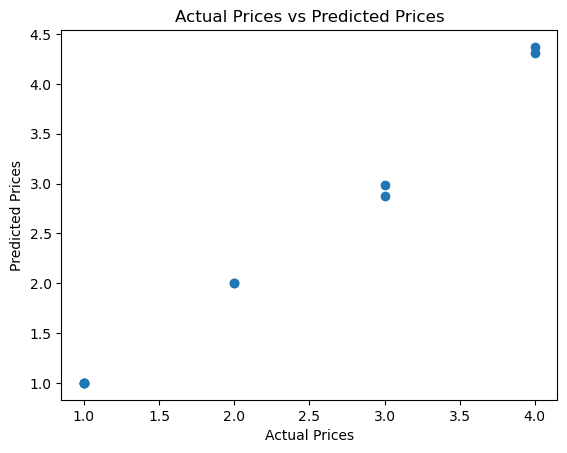

In [78]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

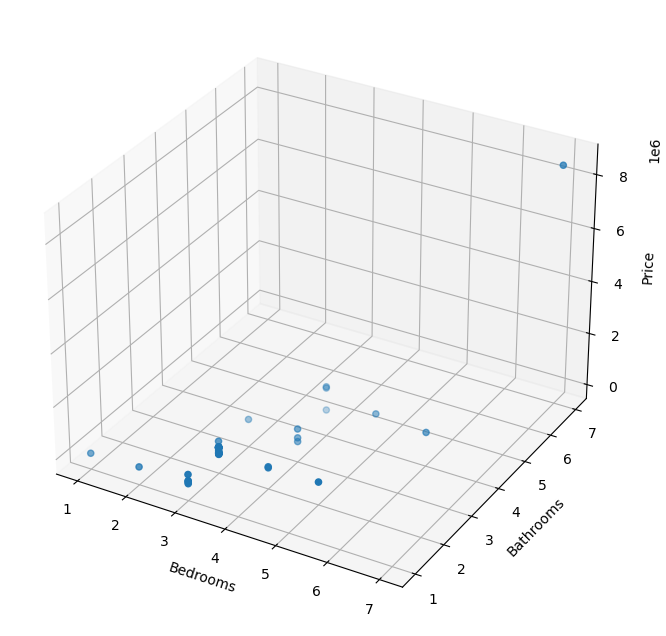

In [79]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['beds']
y = df['baths_full']
z = df['price']

ax.scatter(x, y, z)

ax.set_xlabel('Bedrooms')
ax.set_ylabel('Bathrooms')
ax.set_zlabel('Price')

plt.show()

<AxesSubplot:>

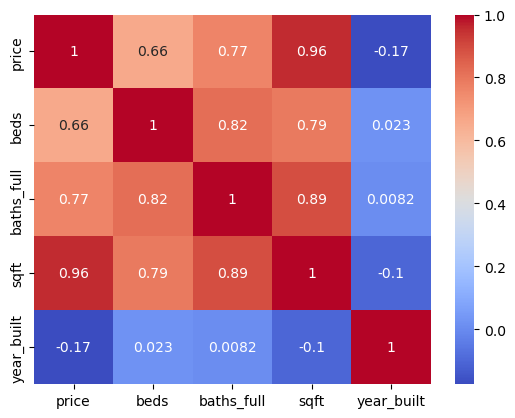

In [80]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)